In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pca-compression/ID_Card.jpg
/kaggle/input/iddcardd/id-card.jpg


In [2]:
#https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

In [3]:
import numpy as np
import cv2

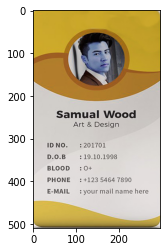

In [4]:
img = cv2.imread('../input/iddcardd/id-card.jpg') # Read in the image and convert to grayscale
img = img[:-20,:-20] # Perform pre-cropping
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = 255*(gray < 128).astype(np.uint8) # To invert the text to white
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, np.ones((2, 2), dtype=np.uint8)) # Perform noise filtering
coords = cv2.findNonZero(gray) # Find all non-zero points (text)
x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
rect = img[y:y+h, x:x+w] # Crop the image - note we do this on the original image
plt.imshow(rect)
plt.show() # Show it

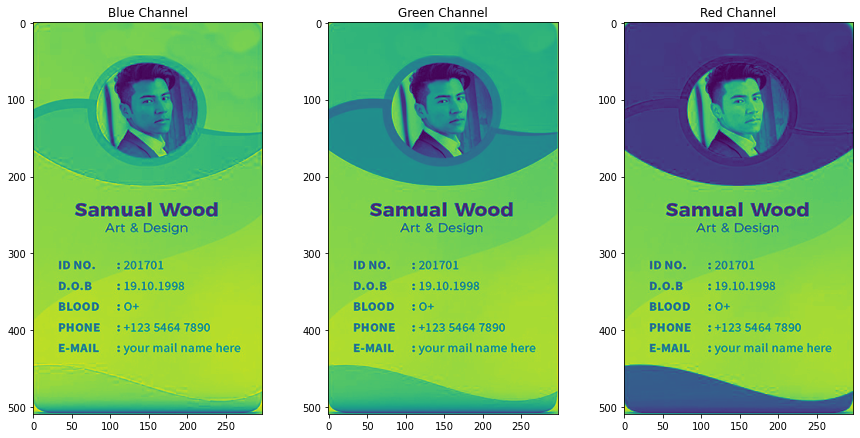

In [5]:
#Splitting into channels
blue,green,red = cv2.split(rect)# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [6]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,288,289,290,291,292,293,294,295,296,297
0,207,211,215,214,230,236,224,210,210,201,...,204,209,213,213,209,209,209,209,209,209
1,212,212,220,232,231,206,185,184,187,194,...,183,192,206,211,211,210,207,209,209,210
2,214,220,233,225,201,174,180,207,216,217,...,184,183,190,201,207,212,210,208,209,209
3,219,235,225,190,173,192,194,202,210,207,...,186,184,184,188,195,209,213,210,209,209
4,230,225,196,181,195,219,212,203,202,205,...,190,186,182,182,188,200,211,212,208,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,233,228,234,236,232,227,227,255,253,236,...,252,223,216,219,220,219,221,225,225,224
505,227,226,228,219,220,231,220,226,233,239,...,214,206,211,218,208,207,216,210,208,214
506,207,205,207,204,193,190,180,176,190,181,...,165,171,174,178,181,188,197,199,198,200
507,204,190,182,181,174,166,159,149,131,125,...,133,143,151,160,171,178,176,187,199,200


In [7]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [8]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [9]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(509, 50)
(509, 50)
(509, 50)


In [10]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9779181592216964
Green Channel: 0.9807614609722457
Red Channel  : 0.9902070836067478


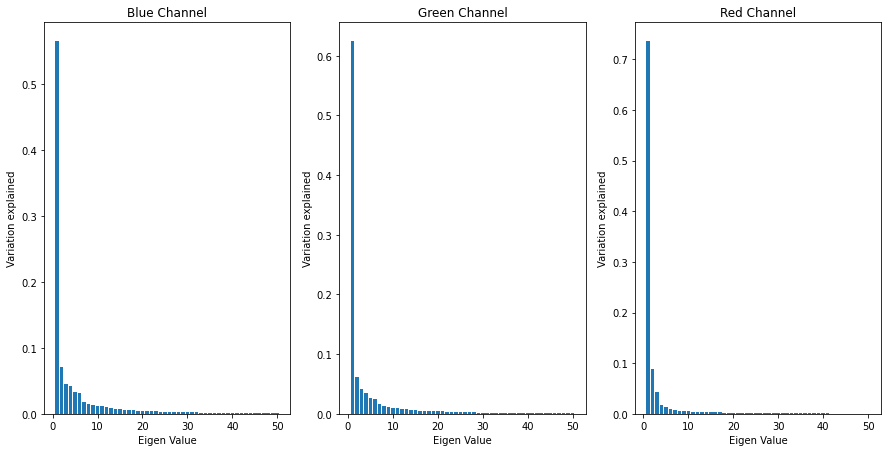

In [11]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

In [12]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(509, 298) (509, 298) (509, 298)


In [13]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(509, 298, 3)


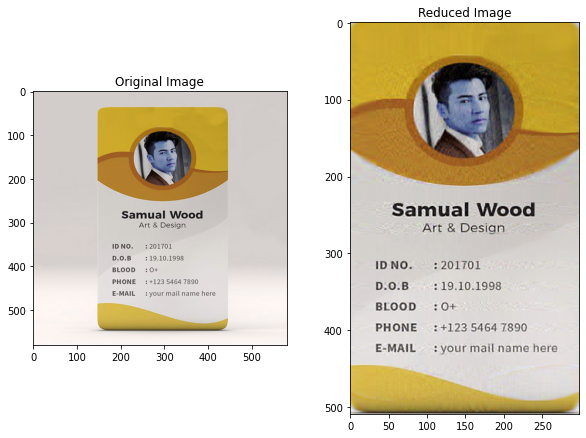

In [14]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.savefig("ID_Card_compressed.jpg")
plt.show()